In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
train_quantitative_metadata_df = pd.read_excel("/content/TRAIN_QUANTITATIVE_METADATA.xlsx")
train_quantitative_metadata_df.head()

#dropped partiicpant_id column
train_quantitative_metadata_df = train_quantitative_metadata_df.drop(columns = "participant_id")

In [19]:
missing_vals = {}
for column in train_quantitative_metadata_df.columns:
  missing_vals[column] = train_quantitative_metadata_df[column].isna().values.sum()
missing_vals

{'EHQ_EHQ_Total': 0,
 'ColorVision_CV_Score': 0,
 'APQ_P_APQ_P_CP': 0,
 'APQ_P_APQ_P_ID': 0,
 'APQ_P_APQ_P_INV': 0,
 'APQ_P_APQ_P_OPD': 0,
 'APQ_P_APQ_P_PM': 0,
 'APQ_P_APQ_P_PP': 0,
 'SDQ_SDQ_Conduct_Problems': 0,
 'SDQ_SDQ_Difficulties_Total': 0,
 'SDQ_SDQ_Emotional_Problems': 0,
 'SDQ_SDQ_Externalizing': 0,
 'SDQ_SDQ_Generating_Impact': 0,
 'SDQ_SDQ_Hyperactivity': 0,
 'SDQ_SDQ_Internalizing': 0,
 'SDQ_SDQ_Peer_Problems': 0,
 'SDQ_SDQ_Prosocial': 0,
 'MRI_Track_Age_at_Scan': 360}

'MRI_Track_Age_at_Scan' is missing values

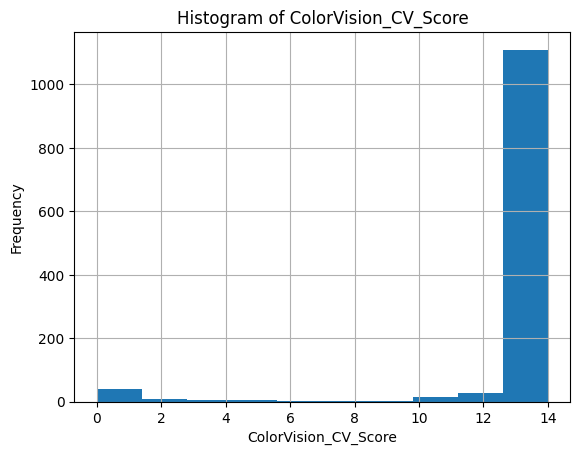

In [29]:
train_quantitative_metadata_df['ColorVision_CV_Score'].hist() # Replace 'column_name'
plt.xlabel('ColorVision_CV_Score')
plt.ylabel('Frequency')
plt.title('Histogram of ColorVision_CV_Score')
plt.show()

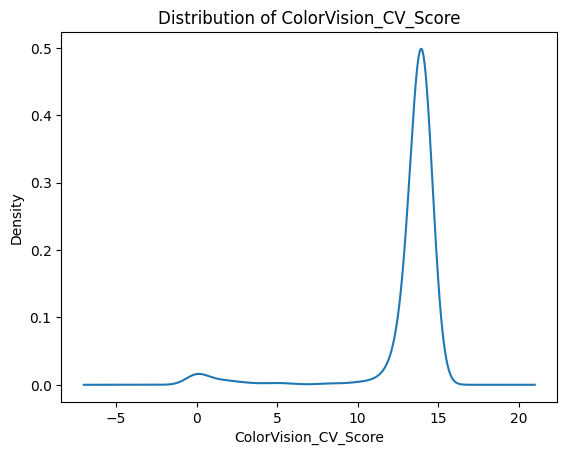

In [42]:
train_quantitative_metadata_df['ColorVision_CV_Score'].plot(kind='kde')
plt.xlabel('ColorVision_CV_Score')
plt.ylabel('Density')
plt.title('Distribution of ColorVision_CV_Score')
plt.show()

Data is heavily skewed towards 10-14, with some outliers at 0.

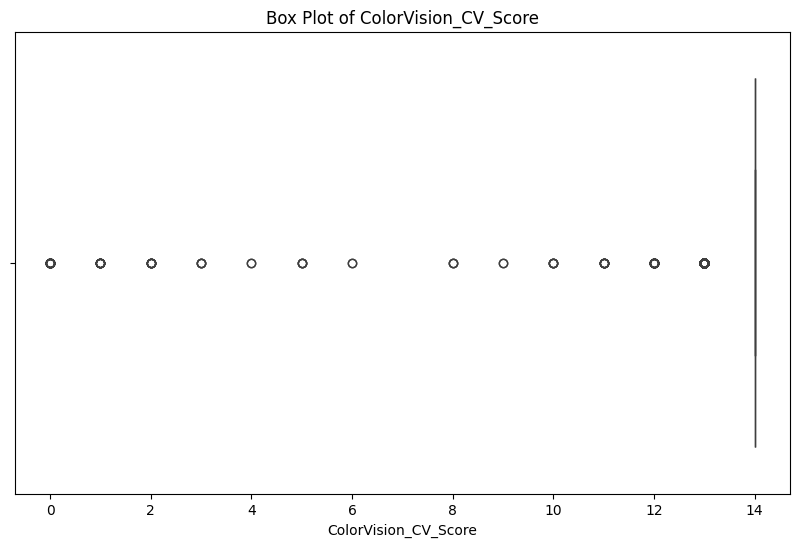

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_quantitative_metadata_df['ColorVision_CV_Score'])

# labels and title
plt.title('Box Plot of ColorVision_CV_Score')
plt.xlabel('ColorVision_CV_Score')
plt.show()

In [44]:
train_quantitative_metadata_df.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


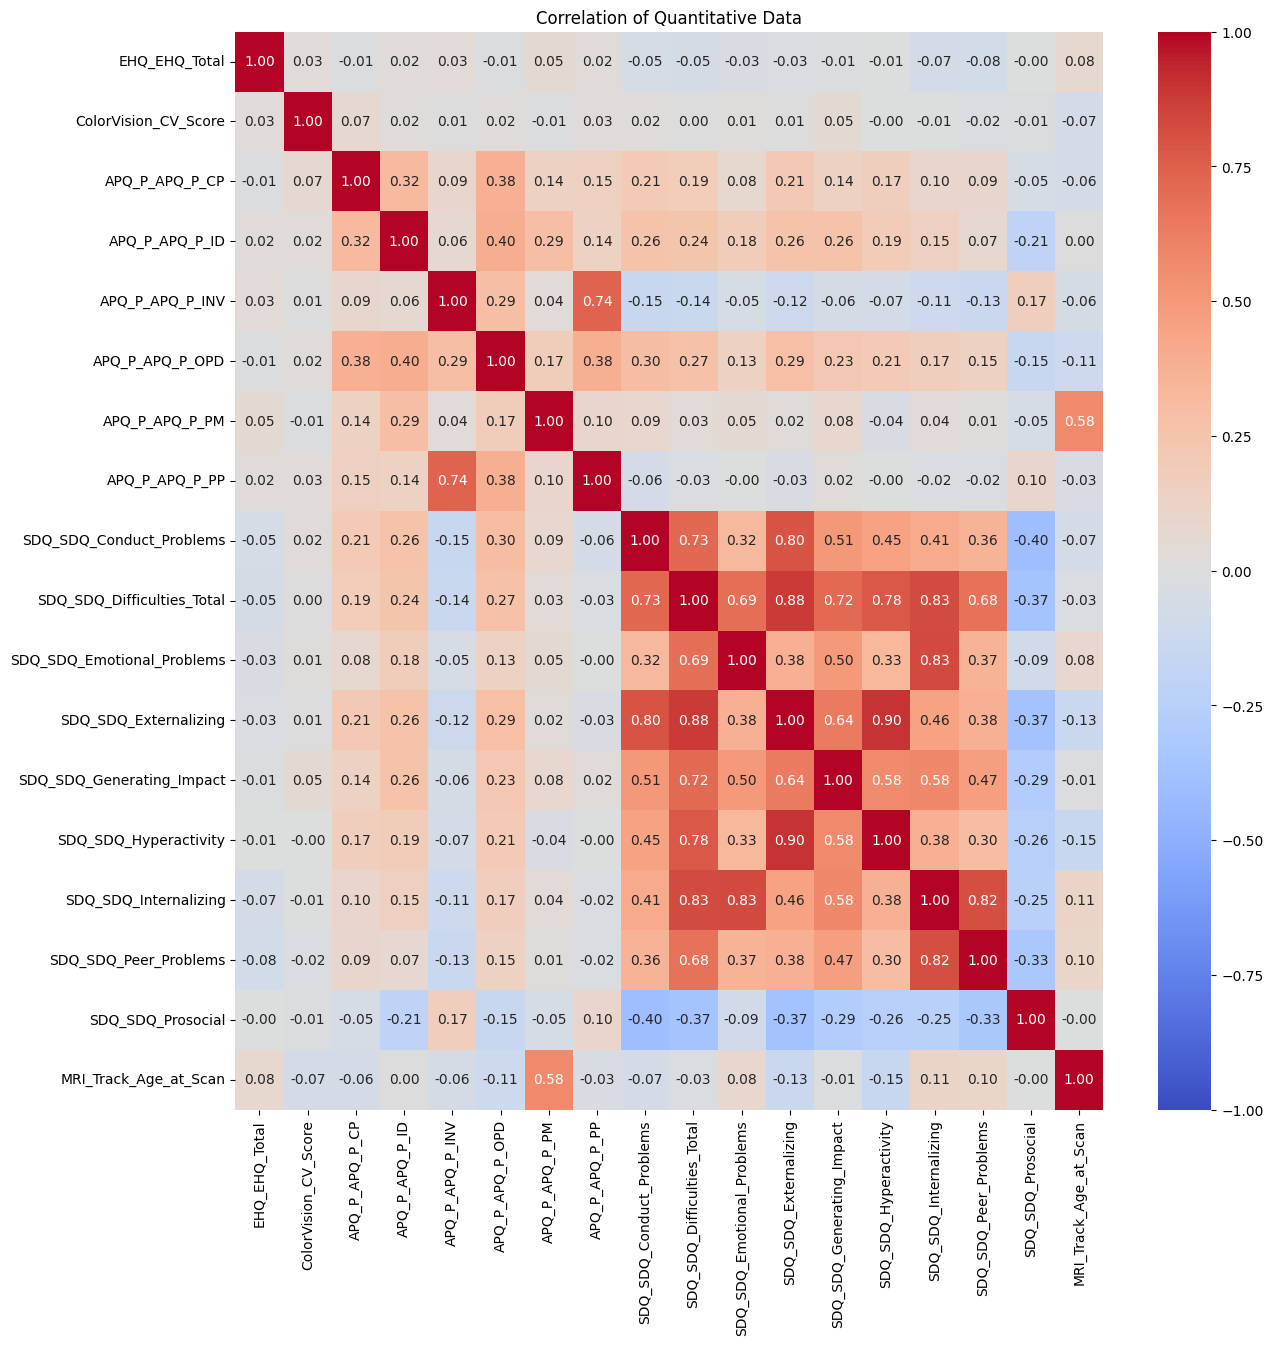

In [38]:
# correlation matrix of entire thing, corre of speicifc questionarers

plt.figure(figsize=(14,14))

sns.heatmap(train_quantitative_metadata_df[train_quantitative_metadata_df.columns].corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Correlation of Quantitative Data")
plt.show()


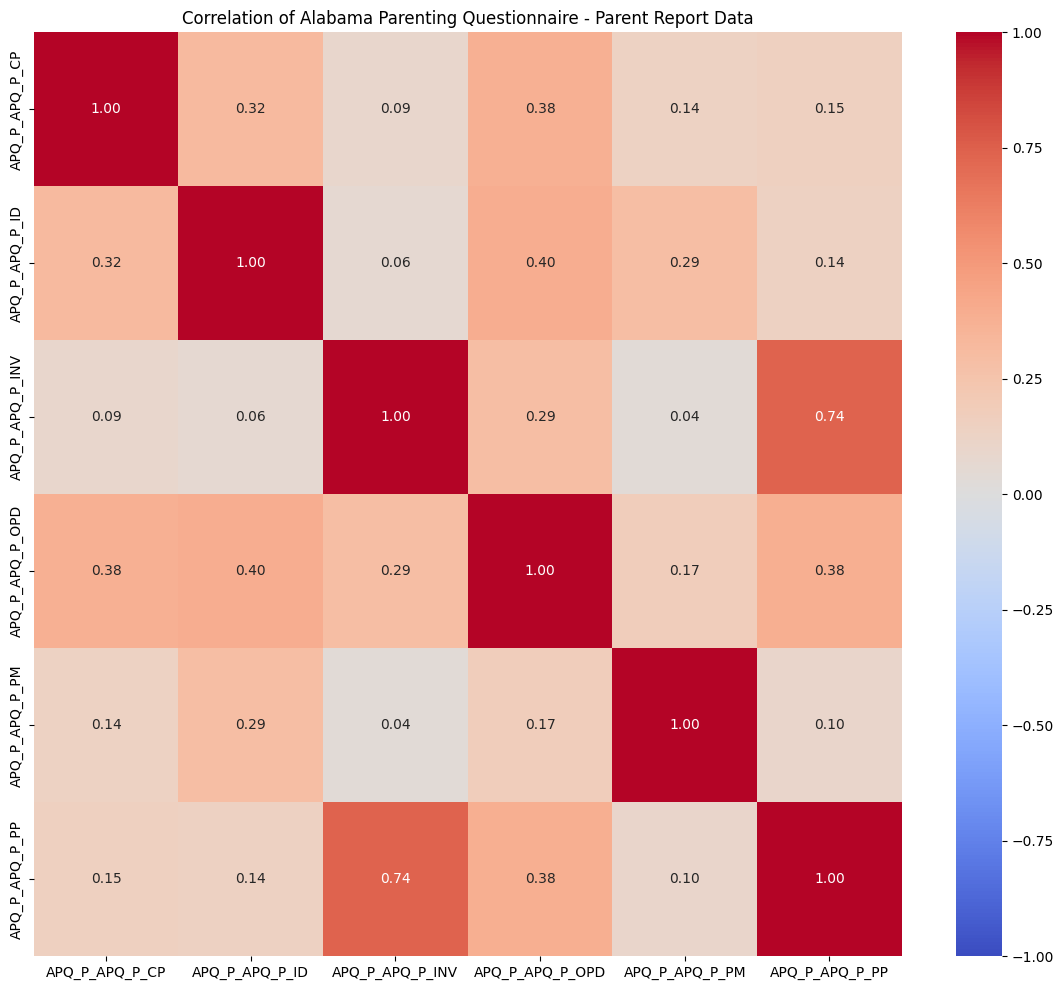

In [39]:


plt.figure(figsize=(14,12))

sns.heatmap(train_quantitative_metadata_df[train_quantitative_metadata_df.columns[2:8]].corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Correlation of Alabama Parenting Questionnaire - Parent Report Data")
plt.show()

Strong positive correlation between parent involvement and positive parenting score.

Strong positive correlation between Other Discipline Practices Score and Corporal Punishment Score/Inconsistent Discipline Score

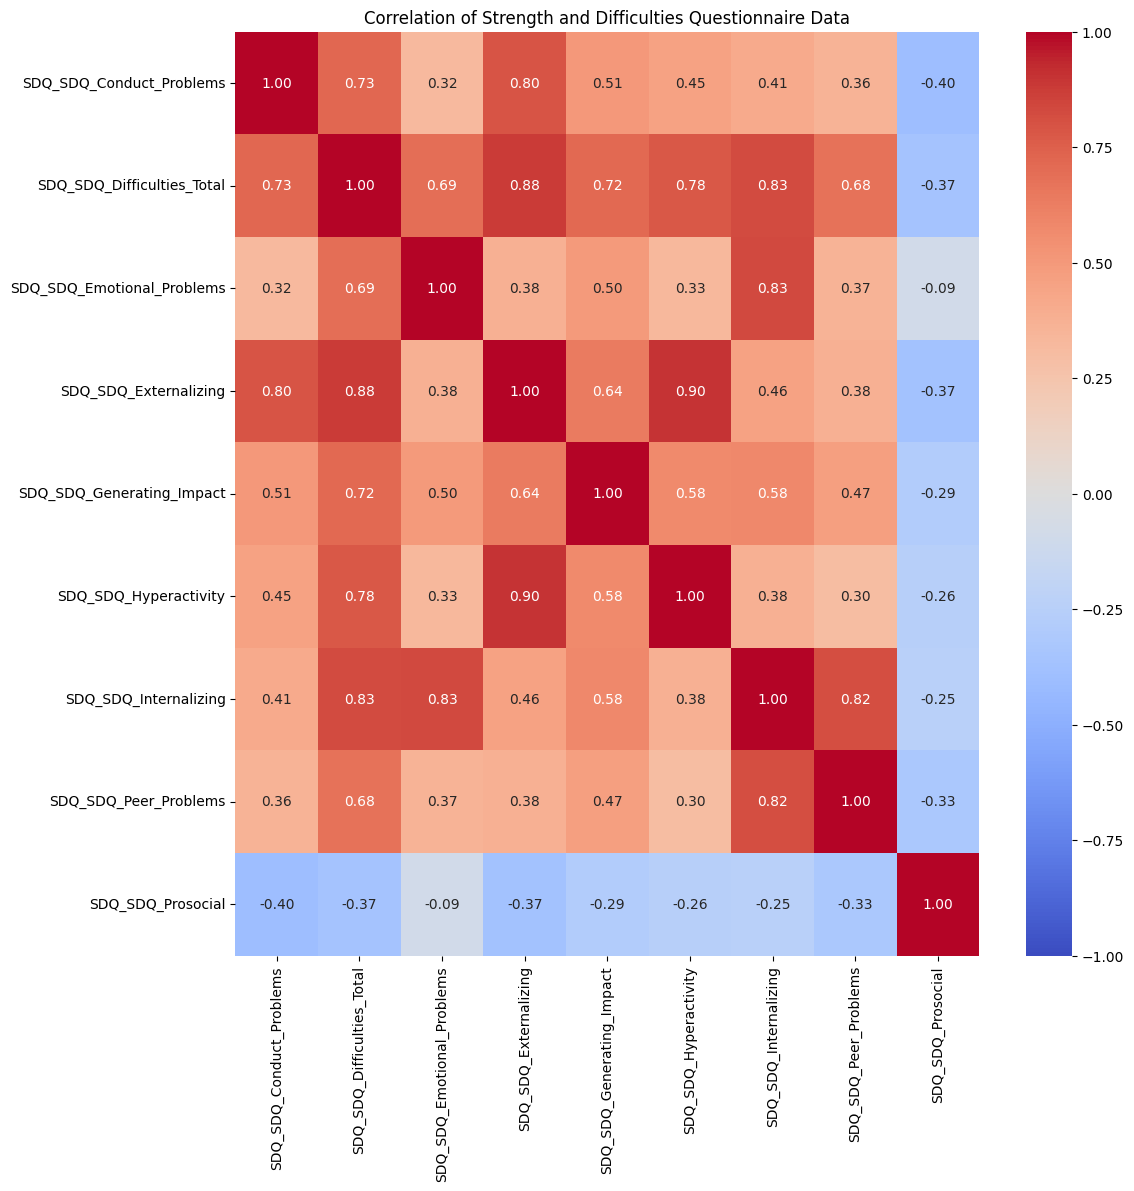

In [40]:
# correlation matrix of entire thing, corre of speicifc questionarers

plt.figure(figsize=(12,12))

sns.heatmap(train_quantitative_metadata_df[train_quantitative_metadata_df.columns[8:17]].corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Correlation of Strength and Difficulties Questionnaire Data")
plt.show()

Strong negative correlation between Prosocial Scale and all of the other categories.

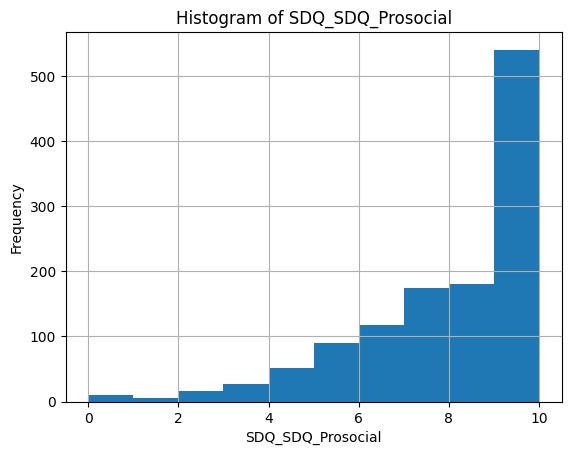

In [45]:
train_quantitative_metadata_df['SDQ_SDQ_Prosocial'].hist() # Replace 'column_name'
plt.xlabel('SDQ_SDQ_Prosocial')
plt.ylabel('Frequency')
plt.title('Histogram of SDQ_SDQ_Prosocial')
plt.show()